# An√°lise de Nascimentos - Rond√¥nia 2019

Este notebook apresenta gr√°ficos gerados a partir dos arquivos mensais de nascimentos no estado de Rond√¥nia em 2019, focando nos meses de mar√ßo, abril, maio, junho e dezembro. O objetivo √© explorar o total de nascimentos por m√™s e sua distribui√ß√£o por sexo.
[texto do link](https://)

In [1]:
# Imports necess√°rios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configura√ß√µes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Imports necess√°rios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configura√ß√µes de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## Dados utilizados

Os arquivos utilizados foram extra√≠dos do sistema SINASC (Sistema de Informa√ß√µes sobre Nascidos Vivos) para o estado de Rond√¥nia, no ano de 2019. Os arquivos considerados foram:

- SINASC_RO_2019_MAR.csv
- SINASC_RO_2019_ABR.csv
- SINASC_RO_2019_MAI.csv
- SINASC_RO_2019_JUN.csv
- SINASC_RO_2019_DEZ.csv

Cada arquivo representa os registros de nascimentos ocorridos no respectivo m√™s.


In [3]:
# Definindo os meses e arquivos
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']
arquivos = {mes: f"SINASC_RO_2019_{mes}.csv" for mes in meses}

# Lendo os dados em um dicion√°rio de DataFrames
dados = {}
for mes, caminho in arquivos.items():
    if os.path.exists(caminho):
        dados[mes] = pd.read_csv(caminho)
    else:
        print(f"Arquivo n√£o encontrado: {caminho}")


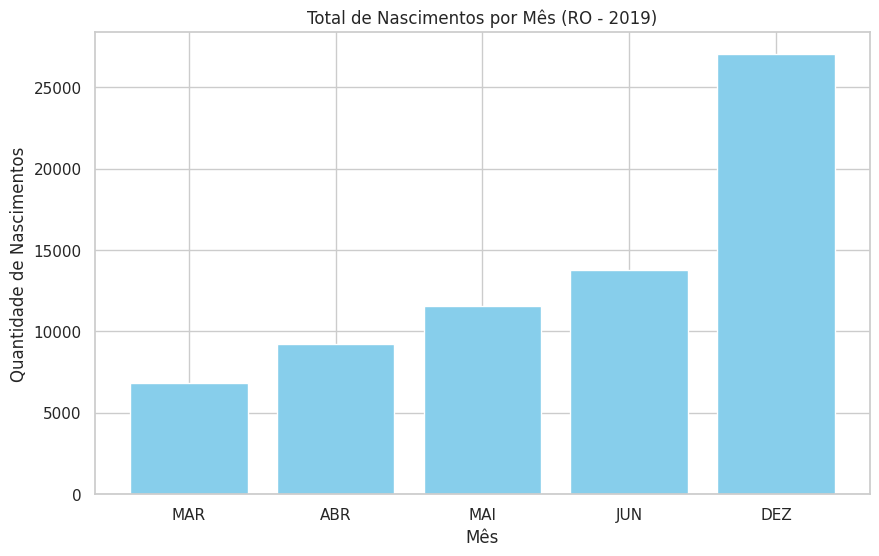

In [4]:
# Contagem de nascimentos por m√™s
totais = {mes: df.shape[0] for mes, df in dados.items()}

# Gr√°fico de barras
plt.bar(totais.keys(), totais.values(), color='skyblue')
plt.title("Total de Nascimentos por M√™s (RO - 2019)")
plt.xlabel("M√™s")
plt.ylabel("Quantidade de Nascimentos")
plt.show()


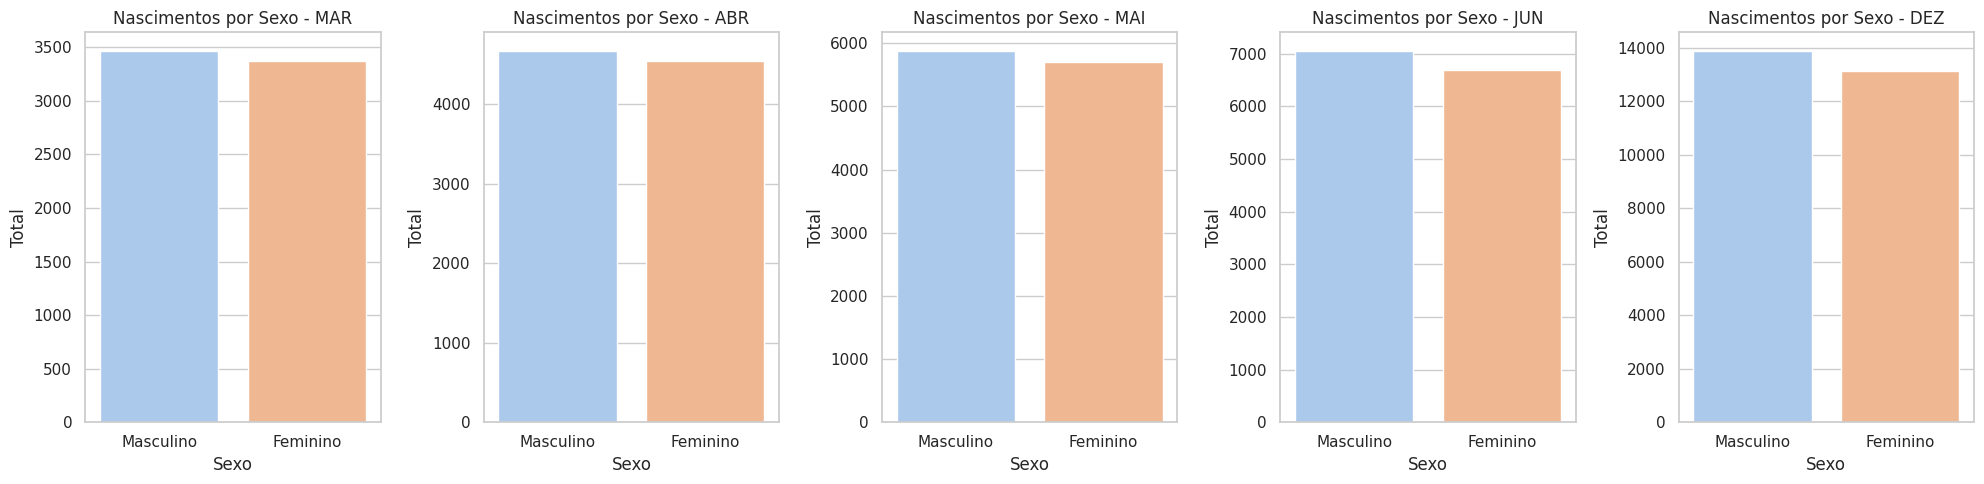

In [6]:
# Gr√°ficos de barras por sexo para cada m√™s (ajustado para evitar warnings futuros)
fig, axs = plt.subplots(nrows=1, ncols=len(meses), figsize=(20, 5))

for idx, mes in enumerate(meses):
    sns.countplot(
        data=dados[mes],
        x="SEXO",
        hue="SEXO",
        ax=axs[idx],
        palette="pastel",
        legend=False
    )
    axs[idx].set_title(f"Nascimentos por Sexo - {mes}")
    axs[idx].set_xlabel("Sexo")
    axs[idx].set_ylabel("Total")

plt.tight_layout()
plt.show()


## üîÅ Como automatizar a gera√ß√£o de gr√°ficos

Abaixo est√£o sugest√µes pr√°ticas para tornar o processo de gera√ß√£o de gr√°ficos mais automatizado e adapt√°vel a diferentes meses ou anos:

---

### 1. Uso de fun√ß√µes reutiliz√°veis

- Criar fun√ß√µes que:
  - Carregam arquivos com base em padr√µes de nomes (ex: `SINASC_RO_2019_MAR.csv`).
  - Geram gr√°ficos a partir de qualquer DataFrame e coluna especificada.
- Isso evita repeti√ß√£o de c√≥digo e facilita a manuten√ß√£o.

---